## PROJECT-2: PART-3 - Machine Learning: Artificial Neural Network


---

In [51]:
# Initial imports
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [52]:
# Set a random seed for TensorFlow to allow reproducible testing results
#tf.random.set_seed(126)

In [53]:
# Read in data
df = pd.read_csv("Sentiment_Scores_1.csv")
sentiment_scores = df.dropna()
data = sentiment_scores.drop(columns=['Unnamed: 0','Stock','Date','JSON File Name'])
data.head()

,Buy/Sell,Sentiment Score
1,1,-0.4767
2,1,0.9075
3,1,0.5236
5,1,0.2023
6,1,0.9756


In [54]:
# Creating Feature and Target
X = data['Sentiment Score']
y = data['Buy/Sell']
# Creating training and testing datasets for logistic Regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=79, 
                                                    )

In [55]:
# Define the model - deep neural net
number_inputs = 1
hidden_nodes_layer = 215

nn = Sequential()
#First hidden layer
nn.add(Dense(units=hidden_nodes_layer, input_dim=number_inputs, activation="relu"))
#Second hidden layer
nn.add(Dense(units=hidden_nodes_layer, activation="relu"))
#Third hidden layer
nn.add(Dense(units=hidden_nodes_layer, activation="relu"))
#Fourth hidden layer
nn.add(Dense(units=hidden_nodes_layer, activation="relu"))
#Output layer
nn.add(Dense(units=1, activation="relu"))


# Compile model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [56]:
# Printing Model Summary
nn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 215)               430       
_________________________________________________________________
dense_26 (Dense)             (None, 215)               46440     
_________________________________________________________________
dense_27 (Dense)             (None, 215)               46440     
_________________________________________________________________
dense_28 (Dense)             (None, 215)               46440     
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 216       
Total params: 139,966
Trainable params: 139,966
Non-trainable params: 0
_________________________________________________________________


8. Fit the model with `100` epochs.

In [57]:
# Fit the model
model = nn.fit(X_train, y_train, epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 4ms/step - loss: 1.7423 - accuracy: 0.4630
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7700 - accuracy: 0.4758
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7274 - accuracy: 0.4690
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7077 - accuracy: 0.4984
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7033 - accuracy: 0.4905
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.5018
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5417
Epoch 8/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6956 - accuracy: 0.4949
Epoch 9/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6944 - accuracy: 0.5229
Epoch 10/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.5295
Epoch 11/

9. Plot the loss function and accuracy.

In [58]:
# Evaluate the model fit with linear dummy data
model_loss, model_accuracy = nn.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

4/4 - 0s - loss: 0.6725 - accuracy: 0.6423
Loss: 0.6724894642829895, Accuracy: 0.642276406288147


In [59]:
# Create a dataframe with the history dictionary
df_plot = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

In [60]:
df_plot

,loss,accuracy
1,1.201675,0.452316
2,0.760980,0.474114
3,0.728079,0.463215
4,0.715570,0.482289
5,0.702616,0.487738
...,...,...
96,0.695628,0.501362
97,0.695383,0.506812
98,0.688471,0.528610
99,0.690365,0.514986


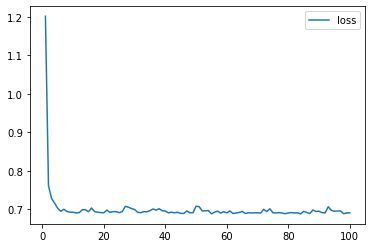

In [61]:
# Plot the loss
df_plot.plot(y="loss")

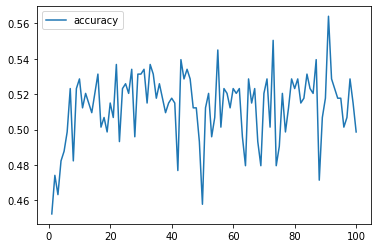

In [62]:
# Plot the accuracy
df_plot.plot(y="accuracy")
